Make sure you installed ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [39]:
!pip install scikit-learn-extra
!pip install scipy

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn_extra
import scipy
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram


In [2]:
categories = ['soc.religion.christian', 'sci.space', 'rec.sport.hockey', 'comp.sys.mac.hardware', 'sci.med']
# categories = ['alt.atheism', 'soc.religion.christian']
# categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
# categories = ['rec.sport.baseball', 'rec.sport.hockey']
# 'alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
# 'comp.sys.mac.hardware','comp.windows.x', 'misc.forsale', 'rec.autos',  
# 'rec.motorcycles',  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
# 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns',
# 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'
train = sklearn.datasets.fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'),)
test = sklearn.datasets.fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'),)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 2964
test data size: 1972


# Nearest Neighbors

In [3]:
idx = 200
inst = train.data[idx]
print(train.data[idx])

I believe it goes or will go:
680060
powerPC
Pentium
680040
486
680030
386
680020
286=680000

In a resent article in one of the macMags I think a 50mHz 030 accelerator was
 slightly slower than a 25mHz 040 accel. But, this is using a system designed
 for the 030. So, It stands to reason that a system designed for an 040 ie
 quadra) would do better. So overall I'd figure 040 = 030 * 2.5 or so.
    Along the same lines the new POwerPC stuff is supposed to run the system
 at the level of a fast quadra, but system 8 or whatever will allow 3 times the
 speed of a 040 in the powerPC based systems. and wait for the 680060. I think
 it laps the pentium.

pro-life pro-women




In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

idx = 200
inst = train.data[idx]
train.target_names[train.target[idx]]
pd.DataFrame.from_dict({'category':[train.target_names[train.target[idx]]], 'email':[inst]})

,category,email
0,comp.sys.mac.hardware,"I believe it goes or will go:\n680060\npowerPC\nPentium\n680040\n486\n680030\n386\n680020\n286=680000\n\nIn a resent article in one of the macMags I think a 50mHz 030 accelerator was\n slightly slower than a 25mHz 040 accel. But, this is using a system designed\n for the 030. So, It stands to reason that a system designed for an 040 ie\n quadra) would do better. So overall I'd figure 040 = 030 * 2.5 or so.\n Along the same lines the new POwerPC stuff is supposed to run the system\n at the level of a fast quadra, but system 8 or whatever will allow 3 times the\n speed of a 040 in the powerPC based systems. and wait for the 680060. I think\n it laps the pentium.\n\npro-life pro-women\n\n"


,category,email
0,comp.sys.mac.hardware,"dhk@ubbpc.uucp (Dave Kitabjian) writes ...\n\n040 486 030 386 020 286\n\n\n060 fastest, then Pentium, with the first versions of the PowerPC\nsomewhere in the vicinity.\n\n\nNo. Computer speed is only partly dependent of processor/clock speed.\nMemory system speed play a large role as does video system speed and\nI/O speed. As processor clock rates go up, the speed of the memory\nsystem becomes the greatest factor in the overall system speed. If\nyou have a 50MHz processor, it can be reading another word from memory\nevery 20ns. Sure, you can put all 20ns memory in your computer, but\nit will cost 10 times as much as the slower 80ns SIMMs.\n\nAnd roughly, the 68040 is twice as fast at a given clock\nspeed as is the 68030.\n"
1,comp.sys.mac.hardware,"I'm thinking about upgrading my 030 50MHz to the 040 33version. Has anyone\nhad any experience with the accelerator, and if so - what do you think?\nAny problems, what are the speedometer results?, is it much faster than\nthe 50MHz? Basically, I'd appreciate hearing all about this product. Please\nrespond via email, and I'll summarize if there's a big response. thanks\nin advance, Andrew\n"
2,comp.sys.mac.hardware,"\nRadius speculated, publicly, that they could provide a PowerPC-based\nRocket for existing Macs. It would have the plus of RocketShare and\nthe minus of NuBus accelerators - no true boot off the accelerator,\nNuBus bottleneck to video and other I/O.\n\nApple, it seems, will not compete with third parties here -- except\nperhaps for not-yet-available Macs like Cyclone, where a PowerPC\nslot might be advertised. Look for Daystar and such to make PowerPC\naccelerators.\n\nOne potential problem with any accelerator, though, is that it will\nneed a ROM companion and Apple has licensed only Radius, with\nRocketshare, to use any of its proprietary code.\n\nApple is, between the lines, trying to let us know that PowerPC Macs\nwill have simplified logic boards due to the magical nature of RISC\nand that these boards should be much cheaper to build than those in\nexisting 68040 Macs. Perhaps, then, we'll see groundbreaking\nprices in Mac-logic board upgrades, much the same way we've seen\nmuch cheaper high-performance CPUs this year.\n\nFirst generation PowerPCs, 98601s, will also hopefully have socketed\nCPUs so that they'll be chip upgradeable to 98604s a year later.\nThis should be possible in much the same way that 486s can be pulled\nfor clock doublers. If there is too much technical baggage (which\nI doubt since the external busses are the same size/width) to do\nthis, perhaps we can have CPU daughterboard, a la Powerbook, as\nstandard to facilitate better CPU upgrades. This is an area where\nApple has fallen far behing the Intel-based world. Perhaps catchup\nis in order.\n\nBy the way, last week's PC week had an excellent story on PowerPC,\nPentium, MIPS R4000, DEC Alpha (the big four on the microprocessor\nfront for the forseeable future). Worth reading for technojunkies.\nAlso, the latest PC has a cover story on Pentium. Read it, and all\nthe other stories about how Intel is unstoppable and preeminent\nright now.\n\nOnce anyone is this secure, they are due to fall. Intel's market\nposition will never again be as dominant as it is today (especially\nif AMD gets the go ahead to sell its 486s this week as it appears it\nmight). The competition from all fronts is gearing up for an awesome\nbattle. Apple users should be excited that PowerPC, while not\nguaranteed dominance, is a guaranteed winner, even if its one of\nseveral."
3,comp.sys.mac.hardware,"\n\n\tI think this kind of comparison is pretty useless in general. The\nprocessor is only good when a good computer is designed around it adn the\ncomputer is used in its designed purpose. Comparing processor speed is\npretty dumb because all you have to do is just increase the clock speed\nto increase speed among other things.\n\n\tI mean how can you say a 040 is faster than a 486 witho

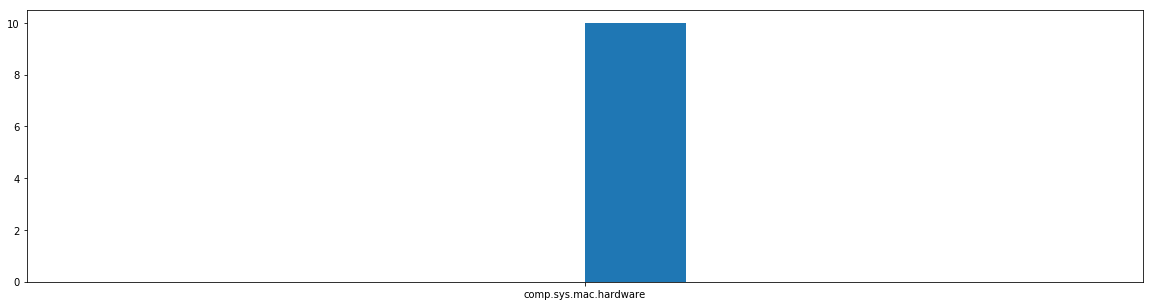

In [5]:
num_neighs = 10

metric = 'cosine' # or 'cosine', 'l1', 'l2'
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True) #create TfIDF vectorizer
train.vecs = features.fit_transform(train.data) #Convert all train data to TfIDF vector representation
nbrs = NearestNeighbors(n_neighbors=num_neighs+1, algorithm='brute', metric=metric).fit(train.vecs)
distances, indices = nbrs.kneighbors(train.vecs[idx])
# for nidx in indices[indices!=idx]:
#   print('-----')
#   print(train.target_names[train.target[nidx]])
#   print(train.data[nidx])
plt.rcParams["figure.figsize"] = (20,5)
plt.hist([train.target_names[nidx] for nidx in train.target[indices[indices!=idx]]])
pd.DataFrame.from_dict({'category':[train.target_names[nidx] for nidx in train.target[indices[indices!=idx]]], 'email':[train.data[nidx] for nidx in indices[indices!=idx]]})

# KMeans

(array([  71.,    0.,  312.,    0.,    0.,  460.,    0.,  331.,    0.,
        1790.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

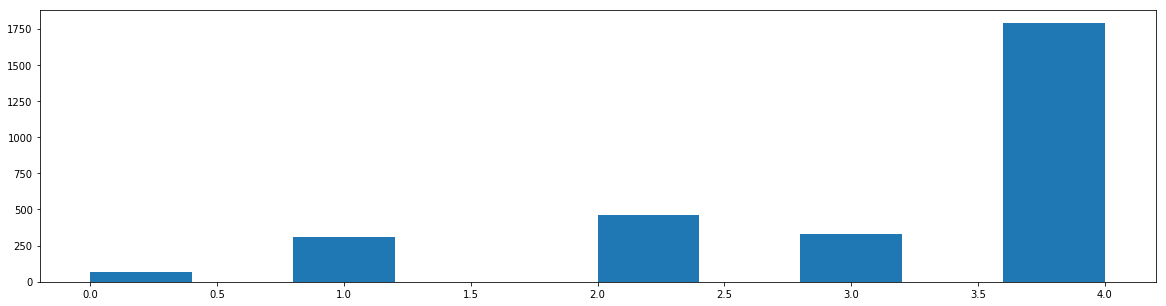

In [7]:
#random.seed(a = 200)
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)
train.vecs = features.fit_transform(train.data)

clusterer = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=5)
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

In [8]:
def purity_score(c, y):
  '''https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html'''
  A = np.c_[(c,y)]
  n_accurate = 0.
  for j in np.unique(A[:,0]):
    z = A[A[:,0] == j, 1]
    x = np.argmax(np.bincount(z))
    n_accurate += len(z[z == x])
  return n_accurate / A.shape[0]
  
def cluster_purity(c, y):
  numy = len(set(y))
  cvals = list(set(c)) #[str(ce) for ce in list(set(c))]
  numc = len(cvals)
  ind = [str(cval) for cval in cvals] #np.arange(numc)
  bottom = np.zeros(numc)
  for yidx in range(numy):
    counts = np.zeros(numc)
    for cidx in range(numc):
      num = len(list(filter(lambda p: p[0]==cvals[cidx] and p[1]==yidx, zip(c,y))))
      counts[cidx] = num
    plt.bar(ind, counts,label=train.target_names[yidx],bottom=bottom)
    bottom = bottom + counts
  plt.legend()

Purity: 0.5752361673414305


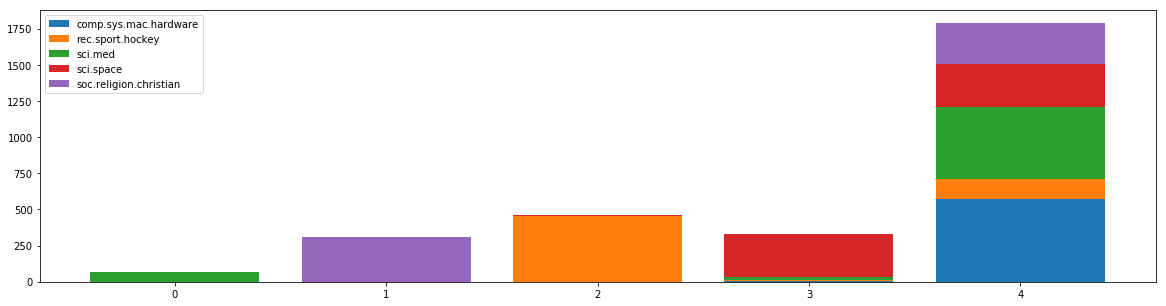

In [9]:
cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

k= 1 done, purity: 0.20242914979757085
k= 2 done, purity: 0.3498650472334683
k= 3 done, purity: 0.48717948717948717
k= 4 done, purity: 0.349527665317139
k= 5 done, purity: 0.20310391363022942
k= 6 done, purity: 0.6460863697705803
k= 7 done, purity: 0.6575573549257759
k= 8 done, purity: 0.6069500674763832
k= 9 done, purity: 0.5340755735492577


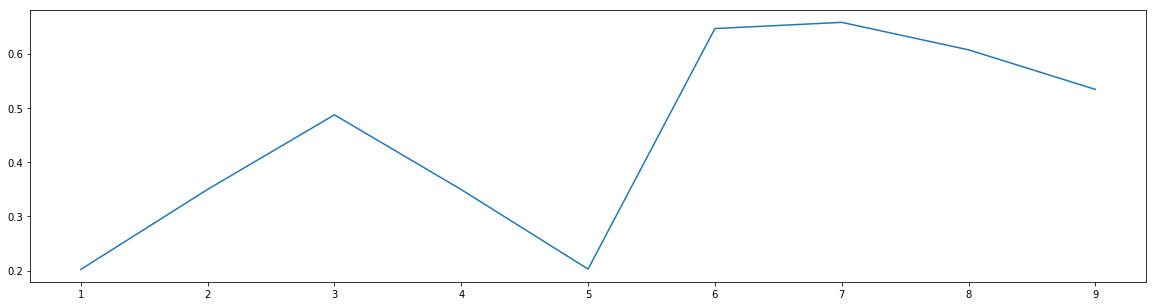

In [10]:
purity = []
krange = range(1,10)
for k in krange:
  tclusterer = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
  clusts = tclusterer.fit_predict(train.vecs)
  purity.append(purity_score(clusts, train.target))
  print('k=',k,'done, purity:', purity[k-1])
plt.plot(krange, purity)

# DBScan

(array([2238.,  404.,   58.,   40.,   13.,  145.,   15.,   21.,   10.,
          20.]),
 array([-1. ,  0.4,  1.8,  3.2,  4.6,  6. ,  7.4,  8.8, 10.2, 11.6, 13. ]),
 <a list of 10 Patch objects>)

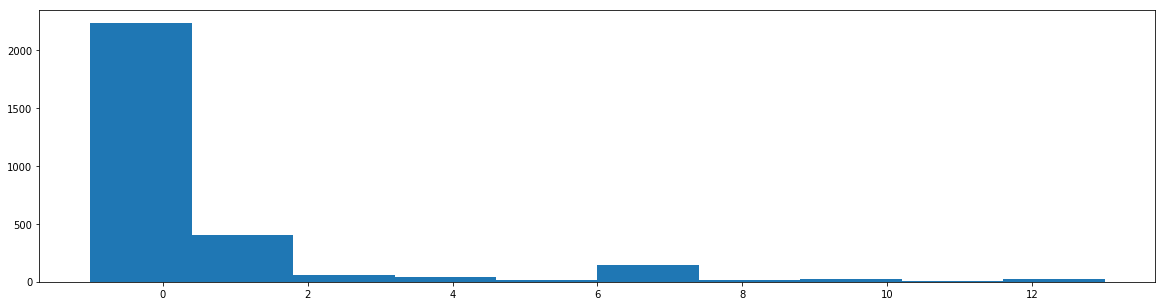

In [27]:
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)
train.vecs = features.fit_transform(train.data)
eps_range = np.arange(0.86,0.88,0.001)
max_purity = 0
#for i in range(len(eps_range)):
#    for j in range(10, 100, 10):
#        clusterer = sklearn.cluster.DBSCAN(eps=eps_range[i], min_samples=j, metric='cosine')
#        clusts = clusterer.fit_predict(train.vecs)
#        score = purity_score(clusts, train.target)
#        print('Purity:', eps_range[i], ",", j, "::",  score)
#        if( score > max_purity):
#            opt_eps = eps_range[i]
#            opt_min_sample = j 
#            max_purity = score

opt_min_sample = 10
opt_eps = 0.9

clusterer = sklearn.cluster.DBSCAN(eps=opt_eps, min_samples=opt_min_sample, metric='cosine')
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

Purity: 0.347165991902834


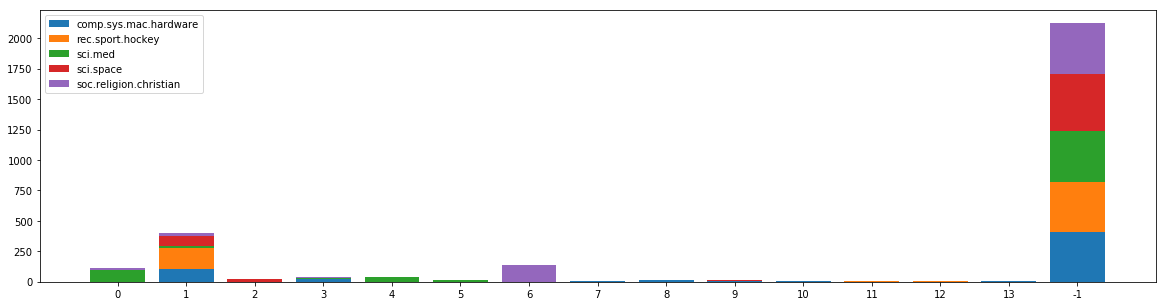

In [28]:
cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

# Agglomerative Clustering

In [29]:
num_points = 500
data = train.data[:num_points]
target= train.target[:num_points]
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True)
vecs = features.fit_transform(data)
clusterer = sklearn.cluster.AgglomerativeClustering()
clusts = np.array(clusterer.fit_predict(vecs.toarray()))

In [30]:
def clustering_from_tree(clusterer, i):
  n_samples = clusterer.n_leaves_
  nodes = clusterer.children_
  pclusts = np.arange(n_samples)
  def label_clust(nid, label):
    if nid < n_samples:
      pclusts[nid] = label
    else:
      lchild = nodes[nid-n_samples][0]
      label_clust(lchild, label)
      rchild = nodes[nid-n_samples][1]
      label_clust(rchild, label)

  #simulate the clustering
  for j in range(i):
    lchild = nodes[j][0]
    label_clust(lchild, n_samples+j)
    rchild = nodes[j][1]
    label_clust(rchild, n_samples+j)
  return pclusts



Number of clusters 5


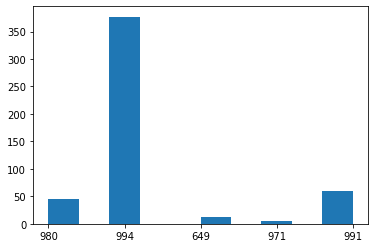

In [50]:
clusts = clustering_from_tree(clusterer, 495)
plt.hist([str(c) for c in clusts])
print("Number of clusters", len(list(set(clusts))))

Purity: 0.592


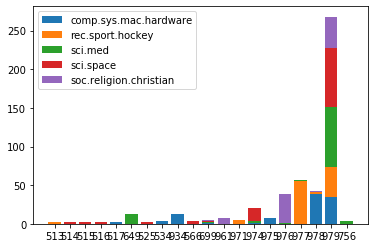

In [47]:
cluster_purity(clusts, target)
print('Purity:', purity_score(clusts, target))

Text(0, 0.5, 'Purities')

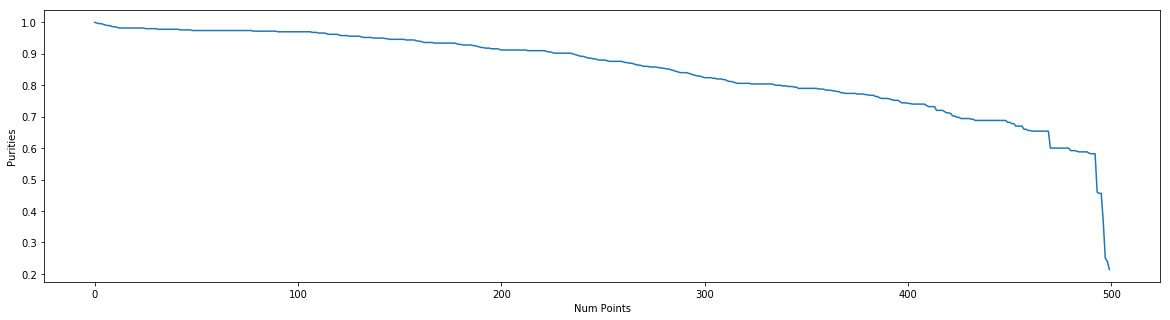

In [32]:
numcs = []
purities = []
for i in range(num_points):
  clusts = clustering_from_tree(clusterer, i)
  numc = len(list(set(clusts)))
  numcs.append(numc)
  purities.append(purity_score(clusts, target))
plt.plot(range(num_points), purities)
plt.xlabel("Num Points")
plt.ylabel("Purities")